In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


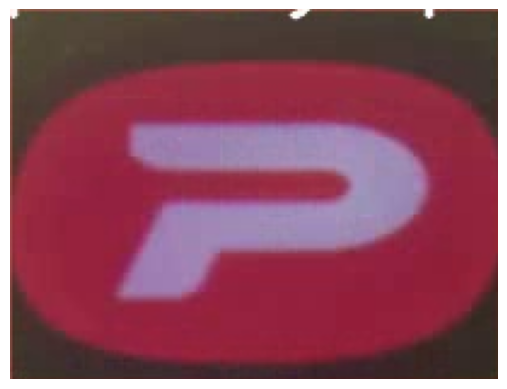

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/frames_detectados/112.jpg')

# Coordenadas de la región a extraer
x1, y1, x2, y2 = 633, 267, 835, 420  # Define tus propias coordenadas

# Extraer la región de la imagen
region_extraida = imagen[y1:y2, x1:x2]

# Mostrar la región extraída en la misma consola
plt.imshow(cv2.cvtColor(region_extraida, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [4]:
from natsort import natsorted

In [5]:
from pathlib import Path
full_list =natsorted([ archivo.as_posix() for archivo in Path('/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/frames_detectados').glob('*')])
#print(full_list)

In [6]:
full_list[0]

'/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/frames_detectados/1.jpg'

In [8]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/framesd.xlsx')
df

,Unnamed: 0,class,xtop,ytop,centrox,centroy,alto,ancho,altox,anchox,x1,y1,x2,y2,proba,frames,imagenid
0,0,1,0.573438,0.477083,734.00064,343.49976,0.162500,0.220833,104.00000,79.499880,633.00064,266.999880,835.00064,419.999640,0.891711,112,1
1,0,1,0.573438,0.475694,734.00064,342.49968,0.164062,0.226389,104.99968,81.500040,632.00096,263.999640,836.00032,420.999720,0.897768,113,2
2,0,1,0.574219,0.475000,735.00032,342.00000,0.164062,0.225000,104.99968,81.000000,633.00064,264.000000,837.00000,420.000000,0.893903,114,3
3,0,1,0.574609,0.474306,735.49952,341.50032,0.169531,0.229167,108.49984,82.500120,629.99968,262.000200,840.99936,421.000440,0.887416,115,4
4,0,1,0.576563,0.487500,738.00064,351.00000,0.176563,0.191667,113.00032,69.000120,628.00032,284.999880,848.00096,417.000120,0.783787,116,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,0,0.648828,0.754167,830.49984,543.00024,0.146094,0.102778,93.50016,37.000080,739.99968,509.000160,921.00000,577.000320,0.766059,744,163
163,0,0,0.630469,0.736806,807.00032,530.50032,0.150000,0.095833,96.00000,34.499988,714.00032,499.000332,900.00032,562.000308,0.848438,747,164
164,0,0,0.632812,0.733333,809.99936,527.99976,0.150000,0.091667,96.00000,33.000012,716.99936,497.999748,902.99936,557.999772,0.808142,748,165
165,0,0,0.628125,0.730556,804.00000,526.00032,0.142188,0.091667,91.00032,33.000012,715.99968,496.000308,892.00032,556.000332,0.757319,749,166


In [9]:
# se seleccionan los frames donde aparecen las imagenes
results = []  # Create an empty list to store the results

for x in range(167):  # Loop from 0 to 166
    if x < len(df):  # Ensure x is within the range of DataFrame rows
        index = df["frames"][x] - 1  # Calculate the index
        if 0 <= index < len(full_list):  # Check if the index is within the valid range
            results.append(full_list[index])  # Add the element to the results list


In [12]:
import os
import shutil
# Ruta de la carpeta de destino donde se guardarán las imágenes seleccionadas
dest_folder = '/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/framesm0/'

for x in range(167):
    if x < len(results):  # Asegúrate de que x esté dentro del rango de imágenes seleccionadas
        source_image = results[x]
        # Genera un nuevo nombre de archivo o utiliza el mismo nombre si es suficiente
        # Puedes personalizar esta parte según tus necesidades
        dest_filename = f"imagen_{x + 1}.jpg"
        dest_path = os.path.join(dest_folder, dest_filename)
        # Copia el archivo a la carpeta de destino
        shutil.copy(source_image, dest_path)

In [51]:
# for para extraer las imagenes<- se puede traer las imagenes de los frames originales
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de x de 0 a 164
for x in range(165):
    # Cargar la imagen
    imagen = cv2.imread('/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/framesm0/imagen_' + str(df["imagenid"][x]) + '.jpg')
    x1=int(df["x1"][0])
    x2=int(df["x2"][0])
    y1=int(df["y1"][0])
    y2=int(df["y2"][0])

    # Coordenadas de la región a extraer
    # x1, y1, x2, y2 = 633, 267, 835, 420  # Define tus propias coordenadas

    # Extraer la región de la imagen
    region_extraida1 = imagen[y1:y2, x1:x2]

    # Guardar la región extraída como una nueva imagen en una carpeta
    # ruta_carpeta_destino = 'ruta_de_la_carpeta_de_destino'  # Reemplaza con la ruta de tu carpeta de destino
    # nombre_imagen_destino = 'region_extraida.jpg'  # Reemplaza con el nombre que desees para la imagen de destino
    ruta_imagen_destino = os.path.join('/content/drive/MyDrive/ANEXOS_TESIS/3.deteccion_de_marca/yolov5/imagenesm1/' + str(df["imagenid"][x]) + '.jpg')

    # Guardar la región extraída como una nueva imagen
    # Guardar la región extraída como una nueva imagen
    cv2.imwrite(ruta_imagen_destino, region_extraida1)
